In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())

In [ ]:
len(df[df['tenure']==0])

11

In [ ]:
df['tenure']=np.where(df['tenure']==0,df['tenure'].median(),df['tenure'])

In [ ]:
len(df[df['tenure']==0])

0

In [ ]:
df.drop(columns='customerID',axis=1,inplace=True)

In [ ]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [ ]:
df['PaymentMethod']=df['PaymentMethod'].str.replace(' (automatic)','',regex=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   float64
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [ ]:
df['MultipleLines']=df['MultipleLines'].str.replace('No phone service','No service')

In [ ]:
for i in df.columns:
  f=df[i].unique()
  print(f)

['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1. 34.  2. 45.  8. 22. 10. 28. 62. 13. 16. 58. 49. 25. 69. 52. 71. 21.
 12. 30. 47. 72. 17. 27.  5. 46. 11. 70. 63. 43. 15. 60. 18. 66.  9.  3.
 31. 50. 64. 56.  7. 42. 35. 48. 29. 65. 38. 68. 32. 55. 37. 36. 41.  6.
  4. 33. 67. 23. 57. 61. 14. 20. 53. 40. 59. 24. 44. 19. 54. 51. 26. 39.]
['No' 'Yes']
['No service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer' 'Credit card']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
['No' 'Yes']


Data Visualisation

<Axes: xlabel='Churn', ylabel='count'>

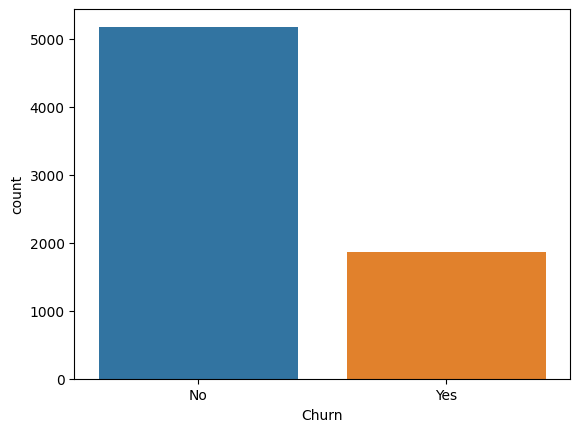

In [ ]:
sns.countplot(x='Churn',data=df)

<ipython-input-44-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

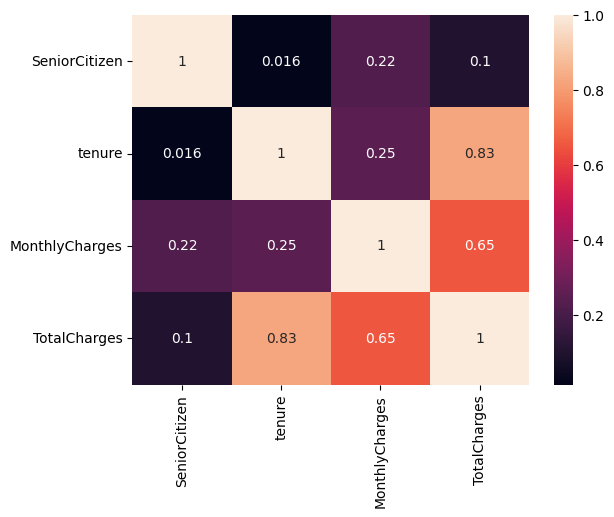

In [ ]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='gender', ylabel='count'>

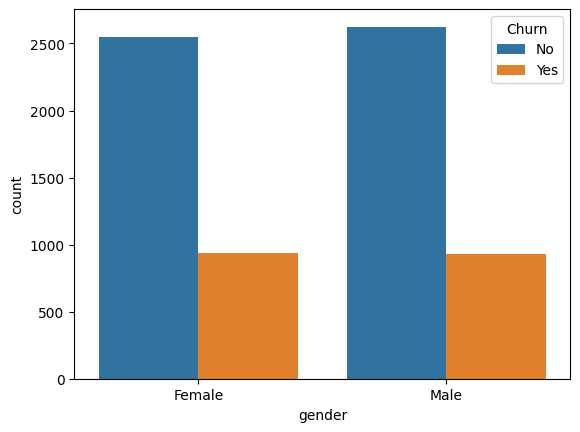

In [ ]:
sns.countplot(x='gender',hue='Churn',data=df)

<Axes: xlabel='Dependents', ylabel='count'>

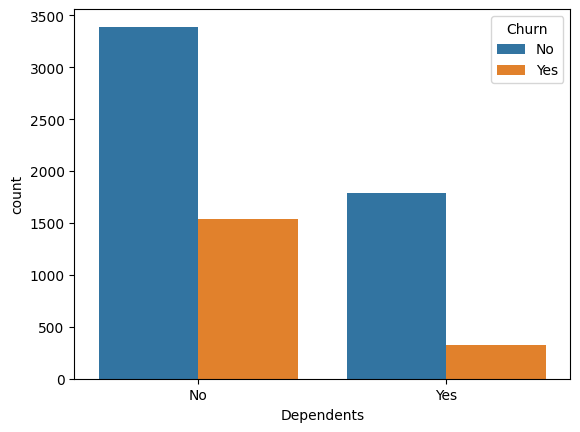

In [ ]:
sns.countplot(x='Dependents',hue='Churn',data=df)

<Axes: xlabel='Partner', ylabel='count'>

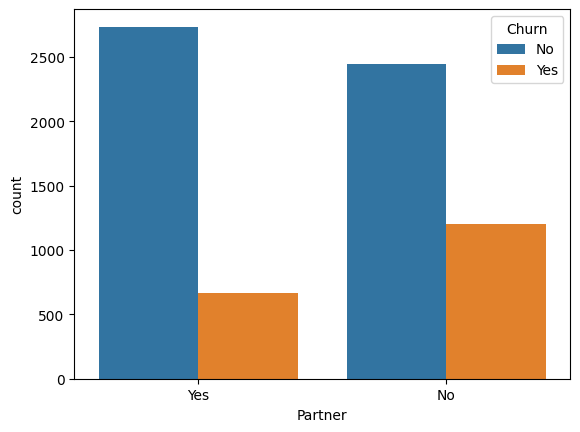

In [ ]:
sns.countplot(x='Partner',hue='Churn',data=df)

<Axes: xlabel='SeniorCitizen', ylabel='count'>

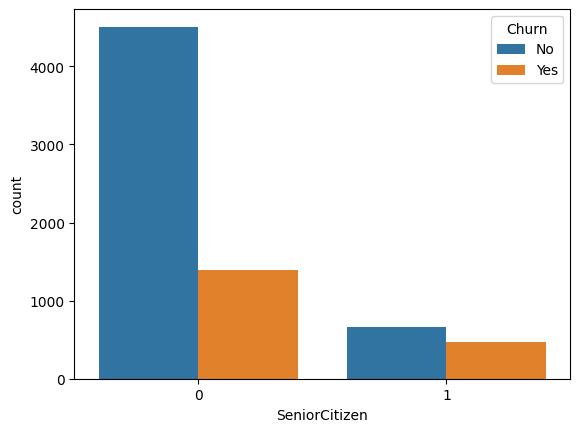

In [ ]:
sns.countplot(x='SeniorCitizen',hue='Churn',data=df)

In [ ]:
X=df.drop(columns=['Churn'],axis=1)

In [ ]:
Y=df['Churn']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   float64
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
df['gender']=df['gender'].fillna(df['gender'].mode()[0])
df['Partner']=df['Partner'].fillna(df['Partner'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['PhoneService']=df['PhoneService'].fillna(df['PhoneService'].mode()[0])
df['MultipleLines']=df['MultipleLines'].fillna(df['MultipleLines'].mode()[0])
df['InternetService']=df['InternetService'].fillna(df['InternetService'].mode()[0])
df['OnlineSecurity']=df['OnlineSecurity'].fillna(df['OnlineSecurity'].mode()[0])

In [ ]:
df['OnlineBackup']=df['OnlineBackup'].fillna(df['OnlineBackup'].mode()[0])
df['DeviceProtection']=df['DeviceProtection'].fillna(df['DeviceProtection'].mode()[0])
df['TechSupport']=df['TechSupport'].fillna(df['TechSupport'].mode()[0])
df['StreamingTV']=df['StreamingTV'].fillna(df['StreamingTV'].mode()[0])
df['StreamingMovies']=df['StreamingMovies'].fillna(df['StreamingMovies'].mode()[0])
df['Contract']=df['Contract'].fillna(df['Contract'].mode()[0])
df['PaperBilling']=df['PaperlessBilling'].fillna(df['PaperlessBilling'].mode()[0])
df['PaymentMethod']=df['PaymentMethod'].fillna(df['PaymentMethod'].mode()[0])
df['Churn']=df['Churn'].fillna(df['Churn'].mode()[0])

Label Encoding

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['gender']= label_encoder.fit_transform(df['gender'])
df['Partner']= label_encoder.fit_transform(df['Partner'])
df['Dependents']= label_encoder.fit_transform(df['Dependents'])
df['PhoneService']= label_encoder.fit_transform(df['PhoneService'])
df['MultipleLines']= label_encoder.fit_transform(df['MultipleLines'])
df['InternetService']= label_encoder.fit_transform(df['InternetService'])
df['OnlineSecurity']= label_encoder.fit_transform(df['OnlineSecurity'])
df['OnlineBackup']= label_encoder.fit_transform(df['OnlineBackup'])
df['DeviceProtection']= label_encoder.fit_transform(df['DeviceProtection'])
df['TechSupport']= label_encoder.fit_transform(df['TechSupport'])
df['StreamingTV']= label_encoder.fit_transform(df['StreamingTV'])
df['StreamingMovies']= label_encoder.fit_transform(df['StreamingMovies'])
df['Contract']= label_encoder.fit_transform(df['Contract'])
df['PaperlessBilling']= label_encoder.fit_transform(df['PaperlessBilling'])
df['PaymentMethod']= label_encoder.fit_transform(df['PaymentMethod'])
df['Churn']= label_encoder.fit_transform(df['Churn'])




Feature Selection

In [ ]:
X=df.drop(columns=['Churn'],axis=1)
Y=df['Churn']

In [ ]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,PaperBilling
0,0,0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,1
1,1,0,0,0,34.0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2.0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45.0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2.0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
X.drop(columns='PaperBilling',axis=1,inplace=True)

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mut=mutual_info_classif(X,Y)
md=pd.Series(mut).sort_values(ascending=False)
md

14    0.104046
4     0.074150
11    0.067005
8     0.061111
7     0.057194
9     0.052552
16    0.050445
10    0.047974
17    0.047943
18    0.044180
13    0.033189
12    0.032467
15    0.020248
2     0.016733
1     0.016656
3     0.015836
6     0.001376
5     0.000000
0     0.000000
dtype: float64

In [ ]:
X.drop(columns=X.iloc[:,[0,5,6,3,1,2,15,12]],axis=1,inplace=True)

In [ ]:
y=md.mean()
y

0.039110821841569686

In [ ]:
for i in md:
  if(i<y):
    print(i)

0.0
0.001963140723165946
0.019914403287577542
0.01204538712420744
0.003443092614312082
0.0
0.03148251558901882
0.031187079558555375
0.023311680532136725


In [ ]:
X.head()

,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges
0,1.0,0,0,2,0,0,0,0,2,29.85,29.85
1,34.0,0,2,0,2,0,0,1,3,56.95,1889.50
2,2.0,0,2,2,0,0,0,0,3,53.85,108.15
3,45.0,0,2,0,2,2,0,1,0,42.30,1840.75
4,2.0,1,0,0,0,0,0,0,2,70.70,151.65


Feature Nornmalisation

In [ ]:
X['tenure']=X['tenure'].astype('float')

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tenure            7043 non-null   float64
 1   InternetService   7043 non-null   int64  
 2   OnlineSecurity    7043 non-null   int64  
 3   OnlineBackup      7043 non-null   int64  
 4   DeviceProtection  7043 non-null   int64  
 5   TechSupport       7043 non-null   int64  
 6   StreamingMovies   7043 non-null   int64  
 7   Contract          7043 non-null   int64  
 8   PaymentMethod     7043 non-null   int64  
 9   MonthlyCharges    7043 non-null   float64
 10  TotalCharges      7043 non-null   float64
dtypes: float64(3), int64(8)
memory usage: 605.4 KB


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25,
                                                    random_state=40, shuffle=True)

Model Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier

def create_models(seed=2):
    '''
    Create a list of machine learning models.
            Parameters:
                    seed (integer): random seed of the models
            Returns:
                    models (list): list containing the models
    '''

    models = []
    models.append(('dummy_classifier', DummyClassifier(random_state=seed, strategy='most_frequent')))
    models.append(('k_nearest_neighbors', KNeighborsClassifier()))
    models.append(('logistic_regression', LogisticRegression(random_state=seed)))
    models.append(('support_vector_machines', SVC(random_state=seed)))
    models.append(('random_forest', RandomForestClassifier(random_state=seed)))
    models.append(('gradient_boosting', GradientBoostingClassifier(random_state=seed)))

    return models

# create a list with all the algorithms we are going to assess
models = create_models()

In [ ]:
from sklearn.metrics import accuracy_score

# test the accuracy of each model using default hyperparameters
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    # fit the model with the training data
    model.fit(X_train, y_train).predict(X_test)
    # make predictions with the testing data
    predictions = model.predict(X_test)
    # calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    # append the model name and the accuracy to the lists
    results.append(accuracy)
    names.append(name)
    # print classifier accuracy
    print('Classifier: {}, Accuracy: {})'.format(name, accuracy))

Classifier: dummy_classifier, Accuracy: 0.7353776263486655)
Classifier: k_nearest_neighbors, Accuracy: 0.7649063032367973)
Classifier: logistic_regression, Accuracy: 0.7876206700738216)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier: support_vector_machines, Accuracy: 0.7353776263486655)
Classifier: random_forest, Accuracy: 0.7575241340147644)
Classifier: gradient_boosting, Accuracy: 0.7881885292447472)


Best model across the 6 models is Gradient Boosting

HyperParameter Tuning

In [118]:
from sklearn.model_selection import RandomizedSearchCV
# define the parameter grid
grid_parameters = {'n_estimators': [80, 90, 100, 110, 115, 120],
                   'max_depth': [3, 4, 5, 6],
                   'max_features': [None, 'auto', 'sqrt', 'log2'],
                   'min_samples_split': [2, 3, 4, 5]}


# define the RandomizedSearchCV class for trying different parameter combinations
random_search = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                                   param_distributions=grid_parameters,
                                   cv=5,
                                   n_iter=150,
                                   n_jobs=-1)

# fitting the model for random search
random_search.fit(X_train, y_train)

# print best parameter after tuning
print(random_search.best_params_)

{'n_estimators': 80, 'min_samples_split': 2, 'max_features': 'log2', 'max_depth': 3}


Performance of the model using Confusion Matrix

In [119]:
from sklearn.metrics import confusion_matrix
random_search_predictions = random_search.predict(X_test)

# construct the confusion matrix
confusion_matrix = confusion_matrix(y_test, random_search_predictions)

# visualize the confusion matrix
confusion_matrix

array([[1159,  136],
       [ 230,  236]])

Evaluation Metrics

In [121]:
from sklearn.metrics import classification_report
print(classification_report(y_test, random_search_predictions))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1295
           1       0.63      0.51      0.56       466

    accuracy                           0.79      1761
   macro avg       0.73      0.70      0.71      1761
weighted avg       0.78      0.79      0.78      1761



In [122]:
accuracy_score(y_test, random_search_predictions)

0.7921635434412265

Hence The accuracy of the Model is almost 80 percent